# Context

In an effort to find a better understanding of the holistic breakdown of the qualities of food from district to district, we asked ourselves a very simple question: Do the average prices of resturanst in San Francisco determine the overall rating of the resturants? 

To perform this analysis we chose to use Yelp's rating and price measure and compare them to one another in an effort to better understand the relationship of ratints on the price of the food. Originally we were hypothesizing that the better rating a resturant had, the higher stars would follow, since the quality would derive a higher price. To explore this data we turned to Yelp's Fusion API. 


## Yelp

Yelp is an American multinational corporation headquartered in San Francisco, California. It develops, hosts and markets Yelp.com and the Yelp mobile app, which publish crowd-sourced reviews about local businesses, as well as the online reservation service Yelp Reservations. The company also trains small businesses in how to respond to reviews, hosts social events for reviewers, and provides data about businesses, including health inspection scores.

source: Wikipedia

## Yelp Fusion API

The Yelp Fusion API allows you to get the best local content and user reviews from millions of businesses across 32 countries. This tutorial provides an overview of the capabilities our suite of APIs offer, provides instructions for how to authenticate API calls, and walks through a simple scenario using the API.

source: https://www.yelp.com/developers/documentation/v3/get_started

The two features used in this project are :

1) /businesses/price - This returned for each resturant a price measure which was originally formatted in dollars signs ranging from one dollar sign to 4, which was converted 1 equaling one dollar sign up to 4 equaling four dollar signs.

2) /businesses/ratings - This returns the star ratings for individual resturants. Each star in the data frame was written as 1 for one star up to 5 for five stars.

# Methodology

To perform this analysis we accessed Yelp's Fusion API and extracted all the features for the top 50 relevant businesses in a particular zipcode. After extracted this information it was further narrowed down to extracting simply the ratings and price, and appending them all to a list that would eventually be averaged and the function that called the API simply returned the zipcode in question, average ratings, and the average price of resturanrs in the respective zipcode.

Running this function for all zipcodes and obtaining all the zipcodes and related average price/rating these were compiled into a dataframe. The zipcodes were then matched to their appropriate districts (there are 10 districts) and plotted.

The plot we used was a seaborn scatter plot, and the hue was set to districts to show all the zipcodes within a district, while still grouped together. This was done in order to obtain a clearer understanding of the resturant's price and ratings relationships, by adding more data points to be analyzed and avoiding generalizing.

In [2]:
import requests
import requests_cache
import pandas as pd
import time
import json
from statistics import mean 
  
def Average(lst): 
    return mean(lst)

requests_cache.install_cache("mycache")
#client_ID = "tnfQpIMYXXvTLF7qgwslXA"
# Reading in API key confidentially
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")

def get_sums(zipcode):   
    key = "ueXGy-SdiwVCXdYW1N09VnyjkWRjQZXKfH0XLT6FZVaJByT3IJGlgwHM8FlyGz8mR6ivRyEOg0NorQvm9Jgszre1XAJT6SOM1N1a_exfKFEb1XChbmcntqcY4lGIXHYx"
    bearer = "Bearer "
    value = bearer + key
    url = "https://api.yelp.com/v3/businesses/search"
    #Retrieves the JSON file
    response = requests.get(url, headers = {'Authorization': value} , params = {
            "location": zipcode,
            "limit": "50",
            "categories": "restaurants"
        })
    response.raise_for_status()
    str_detect = response.text
    yelp_df = response.json()["businesses"]
    df = pd.DataFrame(yelp_df)
    
    #Converting the prices to a quatifiable metric
    df.loc[df.price == '$', 'price'] = '1'
    df.loc[df.price == '$$', 'price'] = '2'
    df.loc[df.price == '$$$', 'price'] = '3'
    df.loc[df.price == '$$$$', 'price'] = '4'


    #new_column = pd.Series(['d', 'e'], name='price', index=[i])
    #df.update(new_column)
    
    # made to an int to compute, and as a float to later make the scatter plot
    mean_of_price = Average(df['price'].astype(float))
    mean_of_ratings = Average(df['rating'].astype(float))
   # mean_of_price = float(mean_of_price)
    #mean_of_ratings = float(mean_of_ratings)
    return zipcode, mean_of_ratings, mean_of_price

# Testing a specific zipcode
get_sums("94123")

('94123', 4.11, 2.3)

In [21]:
list = []
a = get_sums("94121")
b = get_sums("94118")
list.append(a)
list.append(b)
#print(list)
pd.DataFrame(list)

# Zip codes of San Francisco
zips = ("94118", "94121", "94123", "94129", "94108", "94109", "94111", "94133", "94116", "94122", "94117", "94115", "94102", "94103", "94104", "94105", "94127", "94131", "94132", "94114", "94107","94110", "94158", "94112","94124", "94134")
lst = []
for x in zips:
    sums = get_sums(x)
    lst.append(sums)
sums_df = pd.DataFrame(lst)

# Renaming all the columns appropriately
sums_df.columns = ['Zipcodes', 'Mean Ratings', 'Mean Price']

# Adding the appropriate districts to align to thier encompassed zipcodes
districts = ['Richmond', 'Richmond', 'Marina', 'Marina', 'Nob Hill', 'Nob Hill', 'Nob Hill', 'Nob Hill', 'Sunset', 'Sunset', 'Haight', 'Haight', 'Market', 'Market', 'Market', 'Market', 'Twin Peaks', 'Twin Peaks', 'Twin Peaks', 'Castro', 'Mission', 'Mission', 'Mission', 'Portola', 'Portola', 'Portola']

len(districts)
len(sums_df)

sums_df["Districts"] = districts
sums_df

,Zipcodes,Mean Ratings,Mean Price,Districts
0,94118,4.11,2.08,Richmond
1,94121,4.03,1.78,Richmond
2,94123,4.11,2.30,Marina
3,94129,4.05,1.98,Marina
4,94108,4.02,2.34,Nob Hill
5,94109,4.26,2.20,Nob Hill
6,94111,4.07,2.40,Nob Hill
7,94133,4.18,2.32,Nob Hill
8,94116,3.97,1.68,Sunset
9,94122,4.01,1.86,Sunset


## Results

Here we used seaborn plotting to plot all the zipcodes paired with their respective districts. Underneath that there is a fitted regression plot and the amount of variance around the fitted line.

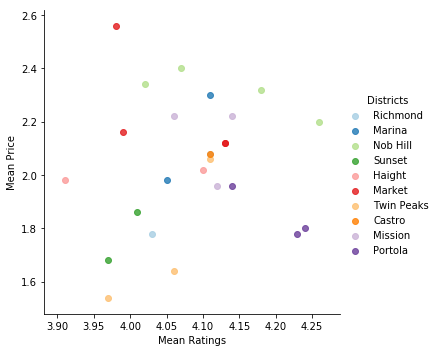

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Zip codes are categorized by district
sns.lmplot(x = 'Mean Ratings', y = 'Mean Price', data = sums_df, fit_reg = False, hue = 'Districts', legend = True, palette="Paired")


In [24]:
ratings = []
for i in sums_df['Mean Ratings']:
    ratings.append(i)

price = []
for i in sums_df['Mean Price']:
    price.append(i)
print(price)
print(ratings)

[2.08, 1.78, 2.3, 1.98, 2.34, 2.2, 2.4, 2.32, 1.68, 1.86, 2.02, 1.98, 2.12, 2.12, 2.16, 2.56, 1.64, 2.06, 1.54, 2.08, 2.22, 1.96, 2.22, 1.8, 1.96, 1.78]
[4.11, 4.03, 4.11, 4.05, 4.02, 4.26, 4.07, 4.18, 3.97, 4.01, 4.1, 3.91, 4.13, 4.13, 3.99, 3.98, 4.06, 4.11, 3.97, 4.11, 4.14, 4.12, 4.06, 4.24, 4.14, 4.23]


In [1]:
import numpy as np
import pylab
Polynomial = np.polynomial.Polynomial

# Used a regression formula from this source below
### https://scipython.com/book/chapter-6-numpy/examples/finding-a-best-fit-straight-line/ ###


ratings = np.array([4.11, 4.03, 4.11, 4.05, 4.02, 4.26, 4.07, 4.18, 3.97, 4.01, 4.1, 3.91, 4.13, 4.13, 3.99, 3.98, 4.06, 4.11, 3.97, 4.11, 4.14, 4.12, 4.06, 4.24, 4.14, 4.23])
price = np.array([2.08, 1.78, 2.3, 1.98, 2.34, 2.2, 2.4, 2.32, 1.68, 1.86, 2.02, 1.98, 2.12, 2.12, 2.16, 2.56, 1.64, 2.06, 1.54, 2.08, 2.22, 1.96, 2.22, 1.8, 1.96, 1.78])

cmin, cmax = min(ratings), max(ratings)
pfit, stats = Polynomial.fit(conc, A, 1, full=True, window=(cmin, cmax),
                                                    domain=(cmin, cmax))

print('Raw fit results:', pfit, stats, sep='\n')

A0, m = pfit
resid, rank, sing_val, rcond = stats
rms = np.sqrt(resid[0]/len(price))

print('Fit: A = {:.3f}[P] + {:.3f}'.format(m, A0),
      '(rms residual = {:.4f})'.format(rms))

pylab.plot(ratings, price, 'o', color='k')
pylab.plot(ratings, pfit(ratings), color='k')
pylab.xlabel('Mean Ratings')
pylab.ylabel('Mean Price')
pylab.show()

NameError: name 'conc' is not defined

# Observations and Comments
From the two plots above, one can see that there does not seem to be a strong relationship between the average price of resturants in each district with the average ratings. But, this may be due to the outliers such as the Portola district as well as Market, which seem to be completely contridictory to what we have had believed. What this does tells us is that when it comes to ratings there seems to be no strong increase in price as ratings increase. From this we can determine that in order to get better quality food, does not mean that necessariy you have to pay the most either. While this information is not as helpful in determining what factor may lead to better quality food, it can have interesting to dive deeper and find out why this is the way that it is.

Some districts that stood out were the Portola district for having some of the highest reviews, while maintaining some of the lowest prices. While Sunset and Nob Hill had some of the best quality food, while maintaining true to our argument that they would premium prices for this quality food. Taking a step further we conducted a regression these points and found that the variance around line of best fit was suprisingly not too high according to the "rms" of the regression. While there is no strong relationship, there may be something worth investigating further down the road. That would be great to probe into, as well as investigating how socio-economic situations effects 